In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [2]:
t_click=pd.read_csv('data/t_click.csv',header=0)
t_click.head()

,uid,click_time,pid,param
0,12177,2016-10-04 12:22:30,1,19
1,29226,2016-10-04 12:18:42,6,1
2,37351,2016-10-04 12:18:41,10,16
3,82053,2016-10-04 12:18:16,1,40
4,82053,2016-10-04 12:18:46,1,40


In [3]:
t_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933016 entries, 0 to 10933015
Data columns (total 4 columns):
uid           int64
click_time    object
pid           int64
param         int64
dtypes: int64(3), object(1)
memory usage: 333.6+ MB


10    5319662
8     2069124
1      951796
6      521929
9      448444
7      371896
5      350695
3      322527
2      294783
4      282160
Name: pid, dtype: int64


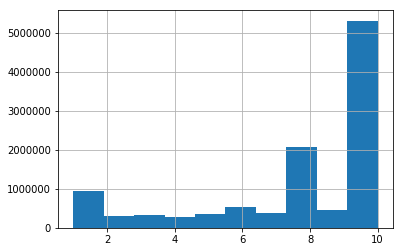

In [4]:
print(t_click['pid'].value_counts())
t_click['pid'].hist()

In [5]:
#sns.distplot(t_click['pid'])


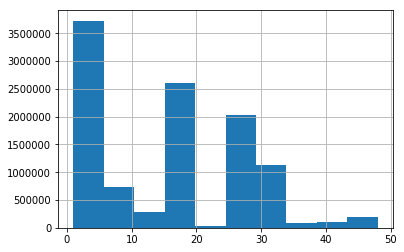

In [6]:
#print(t_click['param'].value_counts())
t_click['param'].hist()

In [7]:
print('点击总数',len(t_click['uid']))
print('点击用户数',len(t_click['uid'].unique()))
print('点击用户数',len(set(t_click['uid'])))
print('平均用户点击次数',len(t_click['uid'])/len(set(t_click['uid'])))

点击总数 10933016
点击用户数 78439
点击用户数 78439
平均用户点击次数 139.38239906169125


In [8]:
#t_click['uid'].hist()#这样不好

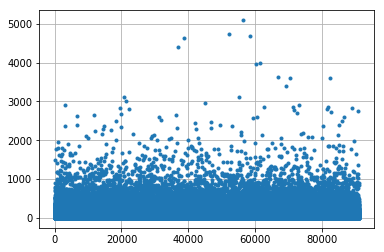

In [9]:
t_click['uid'].value_counts().plot(grid=True,style='.')#没想到怎么画图 散点图 这有啥用？ 每个用户点击行为次数

In [10]:
#t_click['uid'].value_counts()
t_click['uid'].value_counts()[:5]# 取前5

56410    5092
52245    4732
58507    4678
38659    4630
36843    4399
Name: uid, dtype: int64

In [11]:
t_loan=pd.read_csv('data/t_loan.csv',header=0)
t_loan.head()

,uid,loan_time,loan_amount,plannum
0,12135,2016-08-03 00:05:26,3.862595,1
1,41403,2016-08-03 00:13:25,5.584137,3
2,74458,2016-08-03 00:13:58,4.723017,1
3,12959,2016-08-03 00:19:33,3.862595,1
4,89641,2016-08-03 00:23:13,4.292651,1


In [12]:
# 提取月份字段
def get_month(data):
    #print(data['loan_time'].apply(lambda x:x.split('-')[1]))
    data['month']=data['loan_time'].apply(lambda x:int(x.split('-')[1]))# map apply区别
    

In [13]:
get_month(t_loan)
t_loan.head()

,uid,loan_time,loan_amount,plannum,month
0,12135,2016-08-03 00:05:26,3.862595,1,8
1,41403,2016-08-03 00:13:25,5.584137,3,8
2,74458,2016-08-03 00:13:58,4.723017,1,8
3,12959,2016-08-03 00:19:33,3.862595,1,8
4,89641,2016-08-03 00:23:13,4.292651,1,8


In [14]:
#t_loan.info()
t_loan.describe()

,uid,loan_amount,plannum,month
count,202902.000000,202902.000000,202902.000000,202902.000000
mean,45708.612586,4.913411,4.394107,9.492967
std,26178.292813,0.732764,4.448728,1.093293
min,4.000000,2.867536,1.000000,8.000000
25%,23252.000000,4.292651,1.000000,9.000000
50%,45742.000000,4.885961,1.000000,9.000000
75%,68524.000000,5.405416,6.000000,10.000000
max,90993.000000,7.584062,12.000000,11.000000


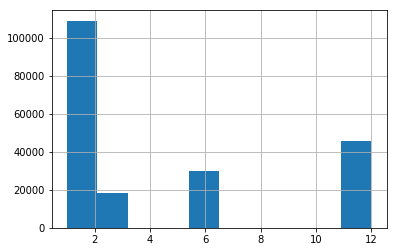

In [15]:
t_loan['plannum'].hist()

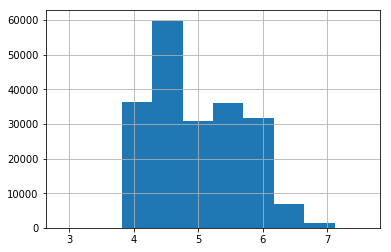

In [16]:
t_loan['loan_amount'].hist()

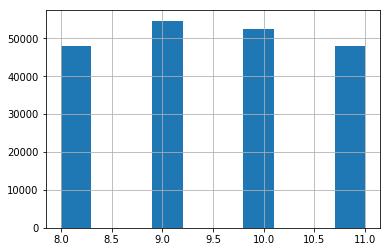

In [17]:
t_loan['month'].hist()

In [18]:
print('8月用户贷款数',len(t_loan[t_loan['month']==8]['uid'].unique()))
print('9月用户贷款数',len(t_loan[t_loan['month']==9]['uid'].unique()))
print('10月用户贷款数',len(t_loan[t_loan['month']==10]['uid'].unique()))
print('11月用户贷款数',len(t_loan[t_loan['month']==11]['uid'].unique()))

8月用户贷款数 19534
9月用户贷款数 21628
10月用户贷款数 21381
11月用户贷款数 19520


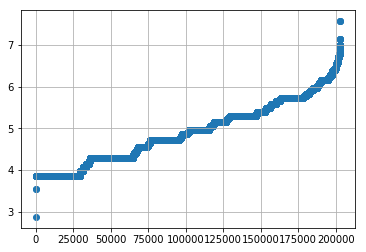

In [19]:
plt.scatter(range(t_loan.shape[0]),np.sort(t_loan['loan_amount'].values))
plt.grid()

In [20]:
print('总数',len(t_loan['uid']))
print('贷款人数',len(set(t_loan['uid'])))
print('每人贷款几次',len(t_loan['uid'])/len(set(t_loan['uid'])))

总数 202902
贷款人数 36697
每人贷款几次 5.529116821538546


In [21]:
t_loan['uid'].value_counts()[:5]

32940    312
40408    184
27667    176
30784    174
17103    164
Name: uid, dtype: int64

In [22]:
loan_sum=pd.read_csv('data/t_loan_sum.csv',header=0)
loan_sum.head()

,uid,month,loan_sum
0,34939,2016-11,6.316423
1,80338,2016-11,6.212631
2,5018,2016-11,6.153414
3,58005,2016-11,6.793132
4,52453,2016-11,4.292651


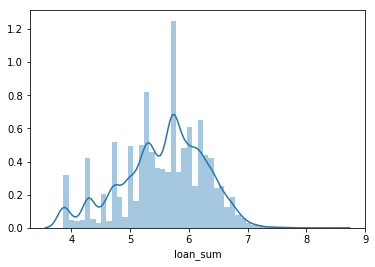

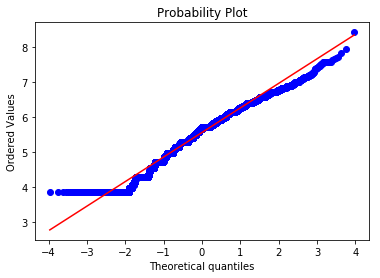

In [23]:
#loan_sum['loan_sum'].hist()
#loan_sum['loan_sum'].plot(kind='kde')
sns.distplot(loan_sum['loan_sum'])
plt.figure()
res=stats.probplot(loan_sum['loan_sum'],plot=plt)

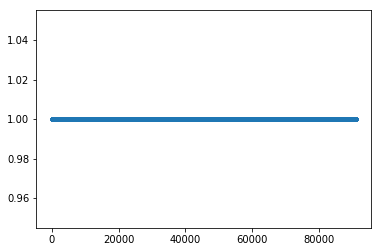

In [24]:
loan_sum['uid'].value_counts().plot(style='.')

In [25]:
print('总',len(loan_sum['uid']))
print('11月有贷款的用户的数量',len(set(loan_sum['uid'])))

#print(len(loan_sum['uid'])/len(set(loan_sum['uid'])))

总 19197
11月有贷款的用户的数量 19197


In [26]:
loan_sum['month'].unique()

array(['2016-11'], dtype=object)

# 两两之间关系

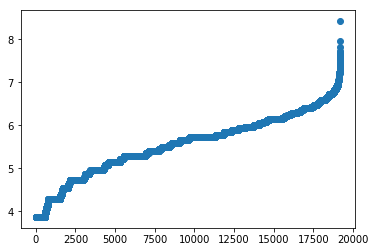

In [27]:
#plt.scatter(loan_sum['uid'],loan_sum['loan_sum'])

plt.scatter(range(loan_sum.shape[0]),np.sort(loan_sum['loan_sum'].values))#np.sort重要

# plt.figure(figsize=(8,6))
# plt.scatter(range(df_loan_sum.shape[0]), np.sort(df_loan_sum['loan_sum'].values))
# plt.xlabel('uid to index', fontsize=15)
# plt.ylabel('loan_sum', fontsize=15)
#plt.show()

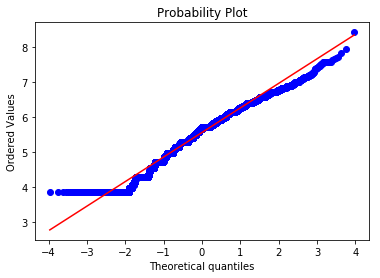

In [28]:
plt.figure()
res=stats.probplot(loan_sum['loan_sum'],plot=plt)#正太分布检验

In [29]:
loan_sum[loan_sum['loan_sum']>8]

,uid,month,loan_sum
7669,37000,2016-11,8.433019


In [70]:
t_user=pd.read_csv('data/t_user.csv',header=0)
t_user.head()

,uid,age,sex,active_date,limit
0,26308,30,1,2016-02-16,5.974677
1,78209,40,1,2016-02-21,5.292154
2,51930,35,1,2016-04-19,6.292055
3,10113,25,1,2016-03-12,6.292055
4,17067,35,1,2016-02-16,5.974677


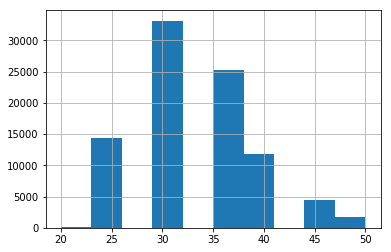

In [31]:
t_user.age.hist()

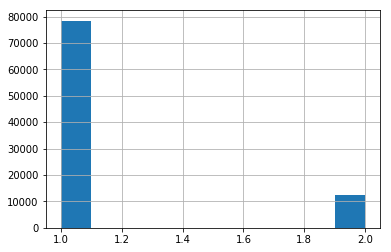

In [32]:
t_user.sex.hist()

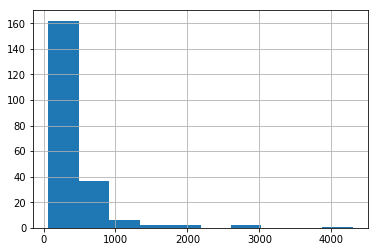

In [33]:
t_user.active_date.value_counts().hist()

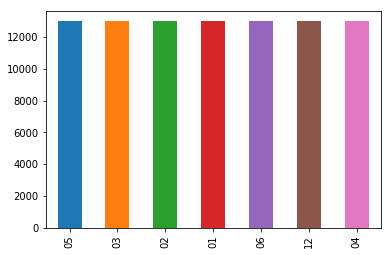

In [65]:
t_user['active_month']=t_user['active_date'].map(lambda x: x.split('-')[1])
t_user['active_month'].value_counts().plot(kind='bar')#  这个特征没什么用

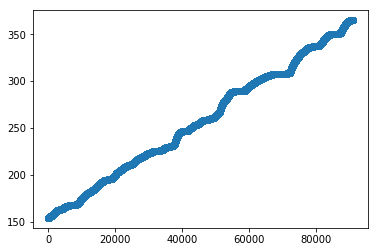

In [73]:
from datetime import datetime
t_user['active_date']=t_user['active_date'].map(lambda x:datetime.strptime('2016-12-1','%Y-%m-%d') - datetime.strptime(x, '%Y-%m-%d'))
t_user['active_date']=t_user['active_date'].map(lambda x:x.days)

plt.scatter(range(len(t_user['active_date'])),np.sort(t_user['active_date'].values))# 线性关系 构造特征

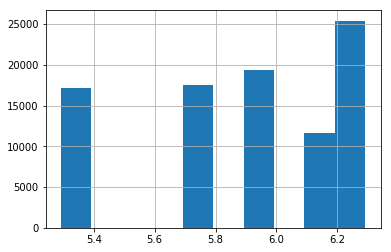

In [34]:
t_user.limit.hist()

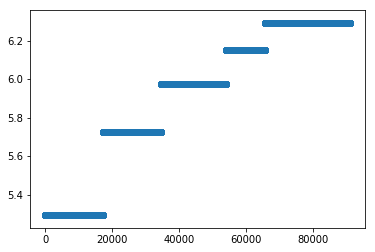

In [35]:
plt.scatter(range(t_user.shape[0]),np.sort(t_user.limit.values))#差异大构造特征 等级

In [36]:
user_loan_sum=pd.merge(t_user,loan_sum,how='left',on='uid')# 注意顺序很重要 
print(user_loan_sum.shape)
user_loan_sum.head()

(90993, 7)


,uid,age,sex,active_date,limit,month,loan_sum
0,26308,30,1,2016-02-16,5.974677,2016-11,5.50118
1,78209,40,1,2016-02-21,5.292154,NaN,NaN
2,51930,35,1,2016-04-19,6.292055,NaN,NaN
3,10113,25,1,2016-03-12,6.292055,NaN,NaN
4,17067,35,1,2016-02-16,5.974677,NaN,NaN


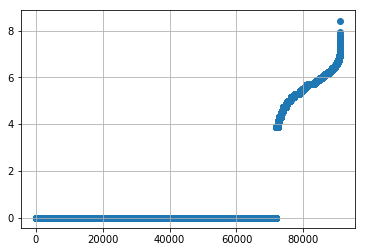

In [37]:
user_loan_sum.fillna(0,inplace=True)
plt.grid()
plt.scatter(range(user_loan_sum.shape[0]),np.sort(user_loan_sum.loan_sum.values))

In [38]:
print('11月有贷款的用户的数量',len(set(loan_sum['uid'])))

11月有贷款的用户的数量 19197


# 反脱敏

In [39]:
temp_loan=t_loan.groupby(['uid','month'],as_index=False).sum()
temp_loan=temp_loan[temp_loan.month==11]
temp_loan=pd.merge(temp_loan,loan_sum,how='outer',on='uid')
#temp_loan['diff']=loan_sum.loan_sum-temp_loan.loan_amount
temp_loan['diff']=temp_loan.loan_sum-temp_loan.loan_amount

In [40]:
print(t_loan.columns)
print(loan_sum.columns)
print(temp_loan.columns)

Index(['uid', 'loan_time', 'loan_amount', 'plannum', 'month'], dtype='object')
Index(['uid', 'month', 'loan_sum'], dtype='object')
Index(['uid', 'month_x', 'loan_amount', 'plannum', 'month_y', 'loan_sum',
       'diff'],
      dtype='object')


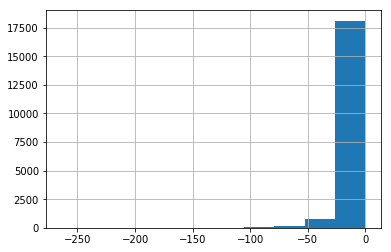

In [41]:
temp_loan['diff'].hist()

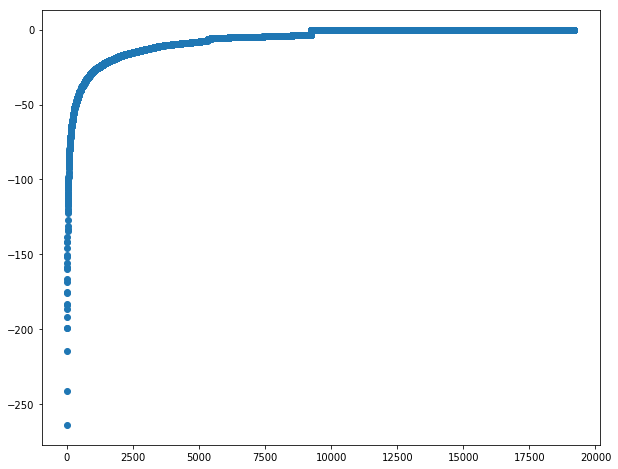

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(range(len(temp_loan['diff'])),np.sort(temp_loan['diff'].values))

In [43]:
import math
for x in range(2,11):
    print(math.pow(x,6.316423),x)

79.6953144056018 2
1032.047454705307 3
6351.343138207723 4
26001.009603946513 5
82249.34638424053 6
217769.3210986002 7
506172.28829732613 8
1065121.9487637028 9
2072158.6352495896 10


In [44]:
#loan_sum.head()
def change_data(x):
    try:
        data=round(math.pow(5,x)-1)
    except:
        data=0
    return data


In [45]:
loan_sum['loan_sum']=loan_sum['loan_sum'].map(lambda x:change_data(x))


In [46]:
#loan_sum['loan_sum']=loan_sum['loan_sum'].map(lambda x:round(x))
loan_sum.head()
#t_loan.head()

,uid,month,loan_sum
0,34939,2016-11,26000
1,80338,2016-11,22000
2,5018,2016-11,20000
3,58005,2016-11,56000
4,52453,2016-11,1000


In [47]:
t_loan['loan_amount']=t_loan['loan_amount'].map(lambda x:change_data(x))
t_loan.head()

,uid,loan_time,loan_amount,plannum,month
0,12135,2016-08-03 00:05:26,500,1,8
1,41403,2016-08-03 00:13:25,8000,3,8
2,74458,2016-08-03 00:13:58,2000,1,8
3,12959,2016-08-03 00:19:33,500,1,8
4,89641,2016-08-03 00:23:13,1000,1,8


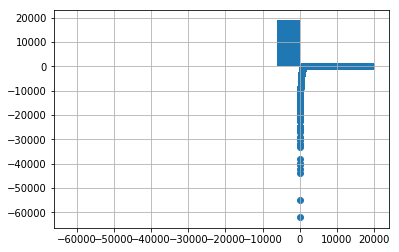

In [48]:
temp_change_loan=t_loan.groupby(['uid','month'],as_index=False).sum()
temp_change_loan=temp_change_loan[temp_change_loan['month']==11]
temp_change_loan=pd.merge(temp_change_loan,loan_sum,how='outer',on='uid')
temp_change_loan['diff']=temp_change_loan['loan_sum']-temp_change_loan['loan_amount']
#plt.scatter(range(len(temp_change_loan['diff'])),np.sort(temp_change_loan['diff'].values))
#temp_change_loan['diff'].unique()
#sns.distplot(temp_change_loan['diff'])
temp_change_loan['diff'].hist()
#print(temp_change_loan.unique())
plt.scatter(range(len(temp_change_loan['diff'])),np.sort(temp_change_loan['diff'].values))#总表11月有空的

In [49]:
#temp_change_loan['loan_sum']
t_loan.head()

,uid,loan_time,loan_amount,plannum,month
0,12135,2016-08-03 00:05:26,500,1,8
1,41403,2016-08-03 00:13:25,8000,3,8
2,74458,2016-08-03 00:13:58,2000,1,8
3,12959,2016-08-03 00:19:33,500,1,8
4,89641,2016-08-03 00:23:13,1000,1,8


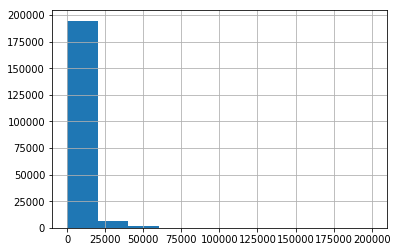

In [50]:
t_loan.loan_amount.hist()

In [51]:
t_loan['hour']=t_loan['loan_time'].map(lambda x:int(x.split(' ')[1].split(':')[0]))
t_loan.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

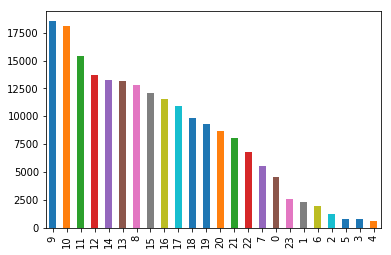

In [52]:
t_loan.hour.value_counts().plot(kind='bar')

9     18541
10    18084
11    15445
12    13722
14    13224
13    13204
8     12824
15    12120
16    11510
17    10947
18     9840
19     9349
20     8668
21     8090
22     6840
7      5560
0      4563
23     2557
1      2374
6      1984
2      1232
5       805
3       805
4       614
Name: hour, dtype: int64

In [74]:
t_user['limit']=t_user['limit'].map(lambda x:change_data(x))#初始额度
t_user.head()

,uid,age,sex,active_date,limit
0,26308,30,1,289,15000
1,78209,40,1,284,5000
2,51930,35,1,226,25000
3,10113,25,1,264,25000
4,17067,35,1,289,15000


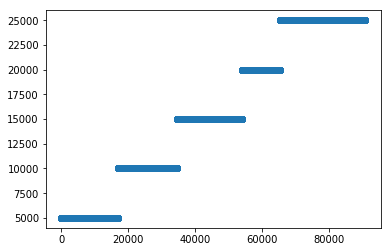

In [76]:
sort_limit=sorted(list(t_user['limit']))
plt.scatter(range(len(sort_limit)), sort_limit)

In [54]:
temp_limit=t_user[['uid','limit']]
month_loan=t_loan.copy().groupby(['uid','month'],as_index=False).sum()
month8=month_loan[month_loan['month']==8]
month9=month_loan[month_loan['month']==9]
month10=month_loan[month_loan['month']==10]
month11=month_loan[month_loan['month']==11]
def exceed_sum(x):
    if x>=0:
        return 1
    else:
        return 0
    

uid            int64
month          int64
loan_amount    int64
plannum        int64
hour           int64
limit          int64
dtype: object


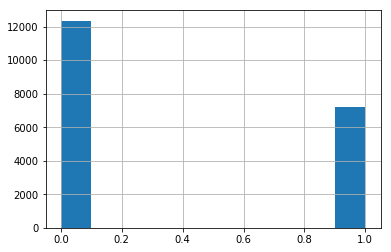

In [55]:
month8=pd.merge(month8,temp_limit,how='left',on='uid')
print(month8.dtypes)
#month8.head()
month8['exceed_loan']=month8['loan_amount']-month8['limit']
month8['exceed_loan']=month8['exceed_loan'].map(lambda x:exceed_sum(x))
month8['exceed_loan'].hist()

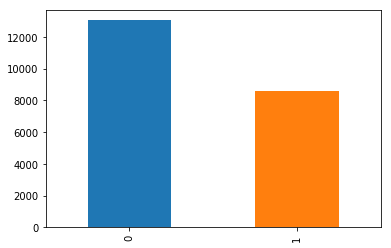

In [56]:
month9=pd.merge(month9,temp_limit,how='left',on='uid')
month9['exceed_loan']=month9['loan_amount']-month9['limit']
month9['exceed_loan']=month9['exceed_loan'].map(lambda x:exceed_sum(x))
month9['exceed_loan'].value_counts().plot(kind='bar')

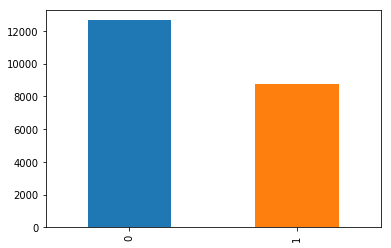

In [57]:
month10=pd.merge(month10,temp_limit,how='left',on='uid')
month10['exceed_loan']=month10['loan_amount']-month10['limit']
month10['exceed_loan']=month10['exceed_loan'].map(lambda x:exceed_sum(x))
month10['exceed_loan'].value_counts().plot(kind='bar')

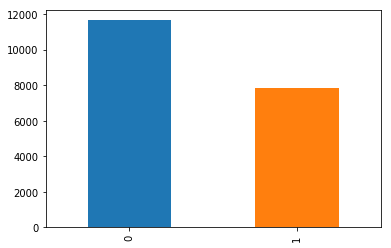

In [58]:
month11=pd.merge(month11,temp_limit,how='left',on='uid')
month11['exceed_loan']=month11['loan_amount']-month11['limit']
month11['exceed_loan']=month11['exceed_loan'].map(lambda x:exceed_sum(x))
month11['exceed_loan'].value_counts().plot(kind='bar')

In [59]:
t_order=pd.read_csv('data/t_order.csv',header=0)
t_order.head()

,uid,buy_time,price,qty,cate_id,discount
0,45370,2016-11-23,3.995009,1,22,0.0
1,66975,2016-11-23,3.269410,1,26,0.0
2,75358,2016-11-23,2.255235,1,14,0.0
3,40597,2016-11-23,1.635284,1,20,0.0
4,83886,2016-11-23,1.920573,2,22,0.0


In [60]:
t_order['price']=t_order['price'].map(lambda x: change_data(x))
t_order.head()

,uid,buy_time,price,qty,cate_id,discount
0,45370,2016-11-23,619,1,22,0.0
1,66975,2016-11-23,192,1,26,0.0
2,75358,2016-11-23,37,1,14,0.0
3,40597,2016-11-23,13,1,20,0.0
4,83886,2016-11-23,21,2,22,0.0


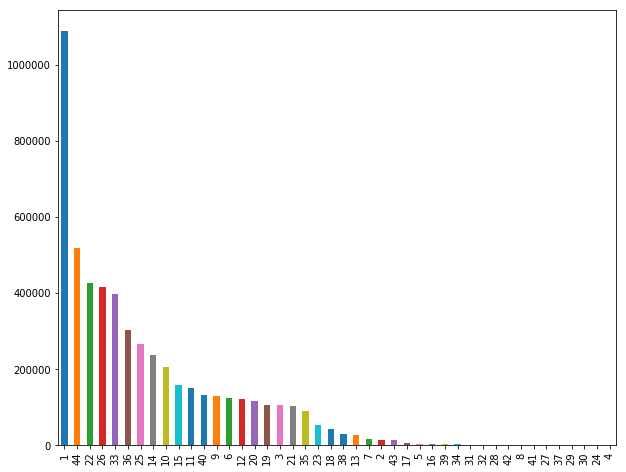

In [61]:
plt.figure(figsize=(10,8))
t_order.cate_id.value_counts().plot(kind='bar')

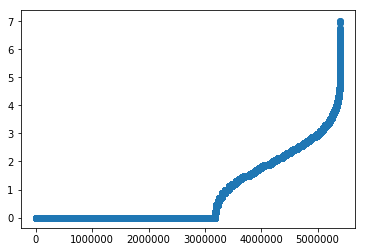

In [62]:
#t_order.discount.hist()
plt.scatter(range(len(t_order.discount)),np.sort(t_order.discount.values))